In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/whole_data.csv", dtype=str)

In [ ]:
df['correct'][1103]


'The PC running Ubuntu is running as well as any new PC .'

In [ ]:
df['incorrect'][1103]

'The PC using Ubuntu is running well as if it is a new PC !'

In [ ]:
df = df.dropna()

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.drop(['correct_input'], axis = 1)

In [ ]:
df = df.drop(['correct_output'], axis = 1)

In [ ]:
df

,correct,incorrect
0,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .
1,"Actually , he was the one who let me know abou...","Actually , who let me know about Lang was him ."
2,His Kanji ability is much better than mine .,His Kanji's ability is much better than me .
3,We have known each other for only half a year ...,We have known each other for only half a year ...
4,I heard a sentence last night when I was watch...,I heard a sentence last night when I watched TV .
...,...,...
496290,"I like Thai , because the pronunciation sounds...","I like Thailand language , because that pronou..."
496291,"I ate kaomangai rice with boiled chickin , t...","I ate kaomangai rise with boild chikin , tom..."
496292,I think it is important to like coriander in o...,I think it is important thing to become to lik...
496293,I went to Umeda station for dating yesterday .,"Yesterday , I went to Umeda station to date ."


In [ ]:
df = df.rename(columns = {'correct' : 'target', 'incorrect':'input'})

In [ ]:
df

,target,input
0,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .
1,"Actually , he was the one who let me know abou...","Actually , who let me know about Lang was him ."
2,His Kanji ability is much better than mine .,His Kanji's ability is much better than me .
3,We have known each other for only half a year ...,We have known each other for only half a year ...
4,I heard a sentence last night when I was watch...,I heard a sentence last night when I watched TV .
...,...,...
496290,"I like Thai , because the pronunciation sounds...","I like Thailand language , because that pronou..."
496291,"I ate kaomangai rice with boiled chickin , t...","I ate kaomangai rise with boild chikin , tom..."
496292,I think it is important to like coriander in o...,I think it is important thing to become to lik...
496293,I went to Umeda station for dating yesterday .,"Yesterday , I went to Umeda station to date ."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496295 entries, 0 to 496294
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  496295 non-null  object
 1   input   496295 non-null  object
dtypes: object(2)
memory usage: 11.4+ MB


In [ ]:
df_input = df['input'].apply(lambda x : len(x.split()))

df_input.describe()

count    496295.000000
mean         13.184650
std           7.346798
min           0.000000
25%           8.000000
50%          12.000000
75%          16.000000
max         438.000000
Name: input, dtype: float64

In [ ]:
df_target = df['target'].apply(lambda x : len(x.split()))

df_target.describe()

count    496295.000000
mean         13.599845
std           7.437703
min           0.000000
25%           9.000000
50%          12.000000
75%          17.000000
max         489.000000
Name: target, dtype: float64

In [ ]:
#  This is the number of characters present in the input sentence
data_input_character_length = df.input.apply(lambda x:len(str(x)))
# This is the number of words present in the input sentence
data_input_word_length = df.input.apply(lambda x: len(str(x).split()))

In [ ]:
#  Maximum charcter length of input sentence
print("Maximum Input Length = ", data_input_character_length.max())

# 99th percentile of length of input characters fall under
print("98th percentile of the characters = ", np.percentile(data_input_character_length, 98))

# Maximum Word length in the input sentence
print("Maximim Input Words = ", data_input_word_length.max())

# 99th percentile of the length of input words fall under
print("98th percentile of the Length of input word = ", np.percentile(data_input_word_length, 98))

Maximum Input Length =  2519
98th percentile of the characters =  163.0
Maximim Input Words =  438
98th percentile of the Length of input word =  33.0


In [ ]:
# This is the number of characters present in the target sentence
data_target_character_length = df.target.apply(lambda x : len(x))
# This ist the number of words present in the target sentence
data_target_word_length = df.target.apply(lambda x : len(x.split()))

In [ ]:

#  Maximum charcter length of input sentence
print("Maximum Target Length = ", data_target_character_length.max())

# 99th percentile of length of input characters fall under
print("98th percentile of the characters = ", np.percentile(data_target_character_length, 98))

# Maximum Word length in the input sentence
print("Maximim Target Words = ", data_target_word_length.max())

# 99th percentile of the length of input words fall under
print("98th percentile of the Length of Target word = ", np.percentile(data_target_word_length, 98))

Maximum Target Length =  2628
98th percentile of the characters =  166.0
Maximim Target Words =  489
98th percentile of the Length of Target word =  34.0


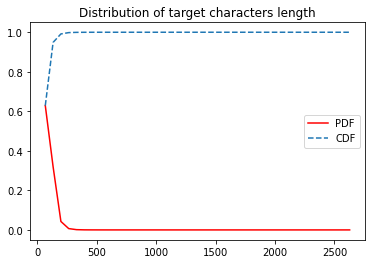

In [ ]:
data = data_target_character_length 
# getting data of the histogram
count, bins_count = np.histogram(data, bins=40)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title('Distribution of target characters length')
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF", linestyle="dashed")
plt.legend()

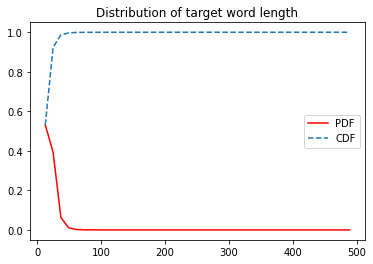

In [ ]:
data = data_target_word_length 
# getting data of the histogram
count, bins_count = np.histogram(data, bins=40)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title('Distribution of target word length')
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF", linestyle="dashed")
plt.legend()

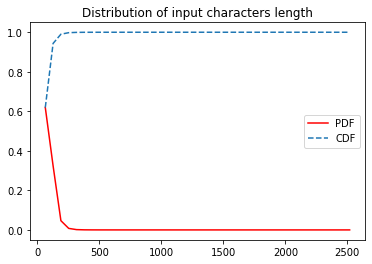

In [ ]:
data = data_input_character_length 
# getting data of the histogram
count, bins_count = np.histogram(data, bins=40)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF

plt.title('Distribution of input characters length')
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF",linestyle="dashed")
plt.legend()

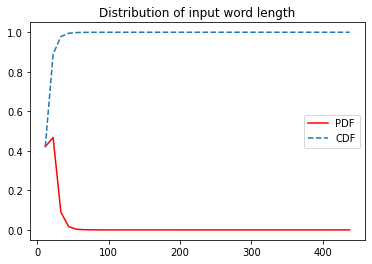

In [ ]:
data = data_input_word_length 
# getting data of the histogram
count, bins_count = np.histogram(data, bins=40)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title('Distribution of input word length')
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF", linestyle="dashed")
plt.legend()

In [ ]:
text_input = ""
text_target = ""

for i in df["input"].values:
  text_input += " " + str(i)

for i in df["target"].values:
  text_target += " " + str(i)

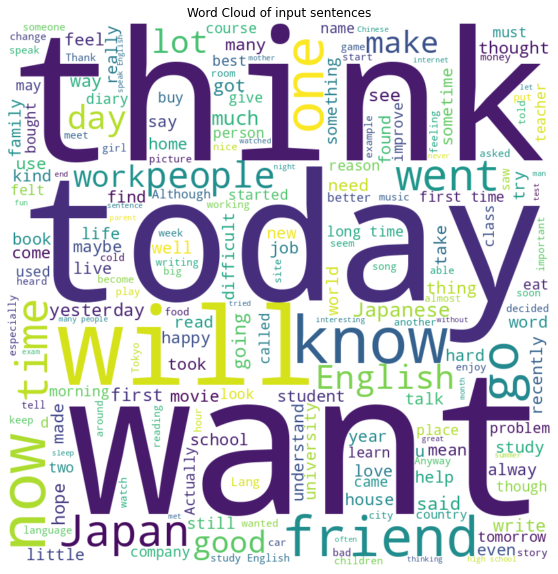

In [ ]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# wordcloud_input = WordCloud(width = 800, height = 800,
#                             background_color='black',
#                             min_font_size= 10, color_func=grey_color_func).generate(input_text)
wordcloud_input = WordCloud(width = 800, height = 800,
                            background_color='white',
                            min_font_size= 10).generate(text_input)

plt.figure(figsize = (16,10))
plt.imshow(wordcloud_input, interpolation="bilinear")
plt.title("Word Cloud of input sentences")
plt.axis("off")
plt.show()

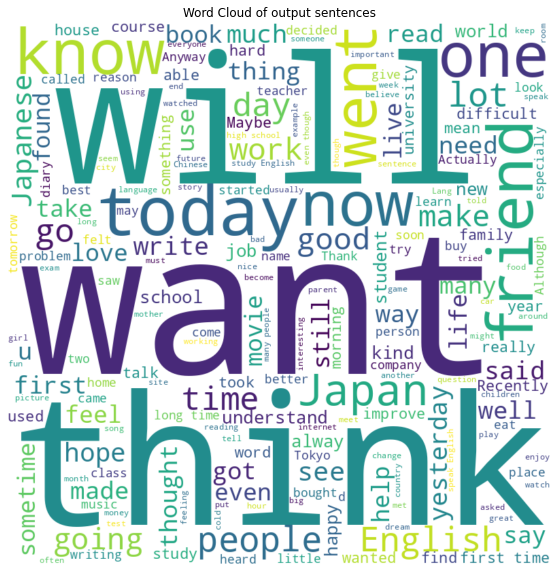

In [ ]:
wordcloud_input = WordCloud(width = 800, height = 800,
                            background_color='white',
                            min_font_size= 10).generate(text_target)

plt.figure(figsize = (16,10))
plt.imshow(wordcloud_input, interpolation="bilinear")
plt.title("Word Cloud of output sentences")
plt.axis("off")
plt.show()